In [1]:
# Text text processing library
import torchtext
from torchtext.vocab import Vectors
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import itertools as it
from models import *
from helpers import *
import main
import matplotlib.pyplot as plt
debug = False

In [2]:
# Our input $x$
TEXT = torchtext.data.Field()

# Data distributed with the assignment
train, val, test = torchtext.datasets.LanguageModelingDataset.splits(
    path=".", 
    train="train.txt", validation="valid.txt", test="valid.txt", text_field=TEXT)

TEXT.build_vocab(train)
if debug:
    TEXT.build_vocab(train, max_size=1000)

train_iter, val_iter, test_iter = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=10, device=-1, bptt_len=32, repeat=False)

# Build the vocabulary with word embeddings
url = 'https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.simple.vec'
TEXT.vocab.load_vectors(vectors=Vectors('wiki.simple.vec', url=url))

In [11]:
train_iter, val_iter, test_iter = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=5, device=-1, bptt_len=32, repeat=False, shuffle=True)
def inspect_batch(batch):
    for i in range(batch.text.data.size(1)):
        print(' '.join([TEXT.vocab.itos[i] for i in batch.text[:,i].data]))
        # print(' '.join([TEXT.vocab.itos[i] for i in batch.text[:,5].data]))
it = iter(train_iter)
for i in range(2):
    batch = next(it)
    print(batch.text.data.size(0))
    inspect_batch(batch)
    print("EOB")
# print(batch.text[:,3])


32
aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> pierre <unk> N years old will join
in part because of buy programs generated by stock-index arbitrage a form of program trading involving futures contracts <eos> but interest <unk> as the day wore on and investors looked ahead to
recorders and personal computers and then sell them at a huge <unk> <eos> the going rate for a small personal computer that costs about $ N in the west is anywhere from
comes across as a <unk> executive mr. phillips has a <unk> <unk> <eos> during time off mr. roman tends to his garden mr. phillips <unk> to a <unk> for among other things
with notes they 're <unk> distinct <eos> dean witter reynolds inc. lost its second recent arbitration case involving a former <unk> executive <eos> a new york stock exchange arbitration panel ordered dean
EOB
32
the board as a nonexecutive directo

Perplexity goals:
count: 120-200
feedforward: 100-150
recurrent: below 100 (between 80-100)

In [245]:
train_iter, _, _  = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=1, device=-1, bptt_len=10000, repeat=False)
tgram = Trigram(TEXT)
tgram.train_counts(train_iter)
tgram.set_alpha(0.25, 0.25)

Iteration 0


In [269]:
_, val_iter, _  = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=1, device=-1, bptt_len=10000, repeat=False)
for (a1, a2) in [(0.3, 0.5)]: #it.product(np.arange(0.1, 1, 0.1), repeat=2):
    if a1 + a2 >= 1:
        continue
    tgram.set_alpha(a1, a2)
    le = LangEvaluator(tgram, TEXT, evalmetric='perplexity')
    print(a1, a2, le.evaluate(val_iter))

Iteration 0
0.3 0.5 191.339042201


In [332]:
params_train = list(filter(lambda p : p.requires_grad, model_nnlm.parameters()))
print([p.size() for p in params_train])

[torch.Size([10001, 300]), torch.Size([60, 1, 6, 300]), torch.Size([60]), torch.Size([10001, 1, 6, 300]), torch.Size([10001]), torch.Size([10001, 60]), torch.Size([10001])]


In [330]:
train_iter, _, _  = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=10, device=-1, bptt_len=32, repeat=False)
model_nnlm = NNLM(TEXT)
trainer = LangTrainer(TEXT, model_nnlm)
trainer.train(train_iter)

Iteration 0, loss: 9.210577, norm: 0.000000
Iteration 10, loss: 9.138780, norm: 0.000000
Iteration 20, loss: 9.048756, norm: 0.000000
Iteration 30, loss: 8.949280, norm: 0.000000
Iteration 40, loss: 8.841352, norm: 0.000000
Iteration 50, loss: 8.572618, norm: 0.000000
Iteration 60, loss: 8.503356, norm: 0.000000
Iteration 70, loss: 8.215203, norm: 0.000000
Iteration 80, loss: 7.986099, norm: 0.000000
Iteration 90, loss: 7.916728, norm: 0.000000


In [5]:
train_iter, _, _  = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=128, device=-1, bptt_len=36, repeat=False)
model_lstm = LSTMLM2(TEXT)
trainer = LangTrainer(TEXT, model_lstm, use_hidden=True, lrn_rate=1.0)
trainer.train(train_iter, num_iter=1)

Using CUDA for evaluation...
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torc

torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 25])
Epoch 0, loss: 170.719833, norm: 2.964386, elapsed: 53.980587, lrn_rate: 1.000000


0

In [7]:
le = LangEvaluator(model_lstm, TEXT, use_hidden=True)
# print(le.evaluate(train_iter))
print(le.evaluate(train_iter))
print(le.evaluate(test_iter))

Using CUDA for evaluation...
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torc

torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 35])
torch.Size([128, 1]) torch.Size([128, 25])
Validation time: 20.875873 seconds
543.5701575796053
torch.Size([128, 1]) torch.Size([10, 31])


RuntimeError: inconsistent tensor sizes at /pytorch/torch/lib/TH/generic/THTensorMath.c:2864

In [4]:
input_str = ['--tt_num_iter=100000',
             '--early_stop', '--batch_sz=1',
             '--bptt_len=1000', '--t_lrn_rate=0.001',
             '--t_lrn_decay=invlin', '--t_lrn_decay_rate=0.1', '--m_word_features=100 ',
             '--t_optimizer=adam',  '--m_kern_size_inner=4', '--m_dropout=0.25',
             '--tt_produce_predictions']
args = main.parse_input(input_str)
# main.train_network(args.network, args, TEXT, (train, val, test))
model = NNLM(TEXT, **main.prepare_kwargs(args, 'm'))
trainer = LangTrainer(TEXT, model, use_hidden=False,
                        **main.prepare_kwargs(args, 't'))

train_iter, val_iter, _ = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=args.batch_sz, device=-1,
    bptt_len=args.bptt_len, repeat=False)
    
if args.early_stop:
    le = LangEvaluator(model, TEXT, use_hidden=False)
    trainer.train(train_iter, le=le, val_iter=val_iter, verbose=True,
                   **main.prepare_kwargs(args, 'tt'))
else:
    trainer.train(train_iter, verbose=True, **main.prepare_kwargs(args, 'tt'))

Argument: m_word_features, Value: 100
Argument: m_hidden_size, Value: 100
Argument: m_dropout, Value: 0.25
Argument: m_kern_size_inner, Value: 4
Argument: m_kern_size_direct, Value: -1
Argument: m_pretrain_embeddings, Value: False
Argument: m_num_layers, Value: 1
Argument: t_lrn_decay_rate, Value: 0.1
Argument: t_retain_graph, Value: False
Argument: t_lrn_rate, Value: 0.001
Argument: t_optimizer, Value: adam
Argument: t_lrn_decay, Value: invlin
Argument: t_clip_norm, Value: -1
Using CUDA for evaluation...
Using CUDA for evaluation...
Argument: tt_produce_predictions, Value: True
Argument: tt_num_iter, Value: 100000
Argument: tt_skip_iter, Value: 1
Epoch 0, loss: 5477.533203, norm: -1.000000, elapsed: 10.869075, lrn_rate: 0.001000
Validation time: 0.343404 seconds
Validation set metric: 292.296586
Epoch 1, loss: 5138.680664, norm: -1.000000, elapsed: 21.949557, lrn_rate: 0.000909
Validation time: 0.295537 seconds
Validation set metric: 224.433073
Epoch 2, loss: 4948.553711, norm: -1.000

KeyboardInterrupt: 

In [ ]:
input_str = ['--network=lstmlm' '--tt_num_iter=100000', 
             '--early_stop', '--bptt_len=36', '--batch_sz=128', '--t_lrn_rate=1.0', 
             '--t_lrn_decay=invlin', '--t_lrn_decay_rate=0.5', 
             '--m_word_features=500', '--t_optimizer=sgd', '--t_clip_norm=5',
             '--m_num_layers=2', '--m_dropout=0.5', 
             '--m_hidden_size=500', '--tt_produce_predictions',
             '--m_tie_weights']
args = main.parse_input(input_str)
# main.train_network(args.network, args, TEXT, (train, val, test))
model = LSTMLM2(TEXT, **main.prepare_kwargs(args, 'm'))
trainer = LangTrainer(TEXT, model, use_hidden=True,
                        **main.prepare_kwargs(args, 't'))

train_iter, val_iter, _ = torchtext.data.BPTTIterator.splits(
    (train, val, test), batch_size=args.batch_sz, device=-1,
    bptt_len=args.bptt_len, repeat=False)
    
if args.early_stop:
    le = LangEvaluator(model, TEXT, use_hidden=True)
    trainer.train(train_iter, le=le, val_iter=val_iter, verbose=True,
                   **main.prepare_kwargs(args, 'tt'))
else:
    trainer.train(train_iter, verbose=True, **main.prepare_kwargs(args, 'tt'))

Argument: m_tie_weights, Value: True
Argument: m_pretrain_embeddings, Value: False
Argument: m_dropout, Value: 0.5
Argument: m_kern_size_direct, Value: -1
Argument: m_num_layers, Value: 2
Argument: m_hidden_size, Value: 500
Argument: m_word_features, Value: 500
Argument: m_kern_size_inner, Value: 5
Argument: t_lrn_decay, Value: invlin
Argument: t_lrn_decay_rate, Value: 0.5
Argument: t_retain_graph, Value: False
Argument: t_clip_norm, Value: 5
Argument: t_optimizer, Value: sgd
Argument: t_lrn_rate, Value: 1.0
Using CUDA for evaluation...
Using CUDA for evaluation...
Argument: tt_skip_iter, Value: 1
Argument: tt_produce_predictions, Value: True
Argument: tt_num_iter, Value: 100
Epoch 0, loss: 224.925583, norm: 3.221404, elapsed: 42.138913, lrn_rate: 1.000000
Validation time: 1.201099 seconds
Validation set metric: 497.713983
Epoch 1, loss: 204.006485, norm: 4.304972, elapsed: 85.941018, lrn_rate: 1.000000
Validation time: 1.314237 seconds
Validation set metric: 281.238881
Epoch 2, loss: 

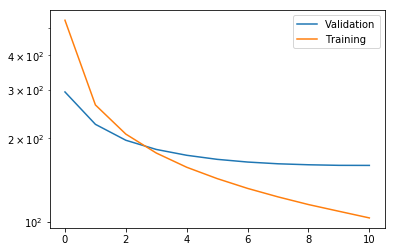

In [8]:
def create_train_val_plots(trainer, size_epoch, sent_len, num_epochs=None):
    if num_epochs is None:
        num_epochs = len(trainer.val_perfs)
        val_perfs = trainer.val_perfs
    else:
        val_perfs = trainer.val_perfs[:num_epochs]
    train_losses = np.mean(np.reshape(trainer.training_losses[:num_epochs * size_epoch], 
                              (num_epochs, size_epoch)), axis=1) / sent_len
    plt.clf()
    # Take exp to get PPL
    plt.plot(list(range(num_epochs)), val_perfs)
    plt.plot(list(range(num_epochs)), list(np.exp(train_losses)))
    plt.yscale('log')
    plt.legend(['Validation', 'Training'])
    plt.savefig('nnlm_plots.png')

create_train_val_plots(trainer, len(train_iter), 1000, num_epochs=11)

## IGNORE STUFF BELOW HERE

In [128]:
    # NOT USED!
    # Here arr is a 1-D numpy array; this returns 
    # groups of n consecutive words (with overlapping)
    def get_ngrams(self, arr, n=3):
        len_ngrams = arr.shape[0] - n + 1
        ngram_inds = np.tile(np.reshape(np.arange(len_ngrams), [len_ngrams, 1]), [1, n]) + \
                    np.tile(np.reshape(np.arange(n), [1, n]), [len_ngrams, 1])
        return np.take(arr, ngram_inds)

In [288]:
a = [1,2,3]
b = [2 * x + i for i,x in enumerate(a)]
print(b)

[2, 5, 8]


In [285]:
print(TEXT.vocab.vectors.size())

torch.Size([10001, 300])


In [5]:
pad_token = TEXT.vocab.stoi['<pad>']
it = iter(train_iter)
cnt = 0
for batch in it:
    cnt += 1
    if (len(np.where(batch.text.data.numpy() == pad_token)[0])):
        print(batch.text.data, cnt)

In [6]:
def f(x):
    print(x)

a = [1]
f(*a)

1
